In [1]:
using Pkg
Pkg.activate("../../Project.toml")

include("../../LogLoss/RealRealHighDimension.jl")
include("../ForecastingMainNew.jl");
using JLD2
using DataFrames
using StatsBase



  Activating project at `~/Documents/QML Project/QuantumInspiredML`


In [4]:
svpath = "../../Data/ecg200/mps_saves/legendreNN2_d8_chi35.jld2"

f = jldopen(svpath, "r")
X_train_scaled = read(f, "X_train_scaled")
y_train = read(f, "y_train")
X_test_scaled = read(f, "X_test_scaled")
y_test = read(f, "y_test");
mps = read(f, "mps")
opts = read(f, "opts")
close(f)

setprecision(BigFloat, 128)
Rdtype = Float64

verbosity = 0
test_run = false
track_cost = false
#
encoding = legendre(norm=false)
encode_classes_separately = false
train_classes_separately = false

#encoding = Basis("Legendre")
dtype = encoding.iscomplex ? ComplexF64 : Float64
opts=Options(; nsweeps=20, chi_max=35,  update_iters=1, verbosity=-1, dtype=dtype, loss_grad=loss_grad_KLD,
bbopt=BBOpt("CustomGD"), track_cost=track_cost, eta=0.0025, rescale = (false, true), d=8, aux_basis_dim=2, encoding=encoding, 
encode_classes_separately=encode_classes_separately, train_classes_separately=train_classes_separately, exit_early=false)
fc = load_forecasting_info_variables(mps, X_train_scaled, 
    y_train, X_test_scaled, y_test, opts);

┌ Warning: saved type Options is missing field sigmoid_transform in workspace type; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/MYcfT/src/data/reconstructing_datatypes.jl:207


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 100 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 8, chi_max = 35

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [6]:
# colvar = Vector{Float64}(undef, size(X_test_scaled, 2))
colvar = var(X_test_scaled; dims=1) 
plot(colvar')
savefig("figs/var.svg")

"/home/noodles/Documents/QML Project/QuantumInspiredML/Interpolation/Interp_benchmarks/figs/var.svg"

In [2]:
path = "midpoint_benchmarks/ecg_1_3_5_7_9_11_13_15_17_19_21_23_25_27_29_31_33_35_37_39_41_43_45_47_49_55_60_65_70_75_80_85_90_95.jld2"

f = jldopen(path, "r") 
    n_midpoints = f["n_midpoints"] 
    stats = f["stats"]
    MSE_stats = f["MSE_stats"]
    ps = f["ps"]
close(f)

In [7]:
svpath = "midpoint_benchmarks/ecg_long.jld2"

f = jldopen(svpath, "w") 
    f["n_midpoints"] = n_midpoints 
    f["stats"] = stats 
    f["MSE_stats"] = MSE_stats
close(f)

UndefVarError: UndefVarError: `n_midpoints` not defined

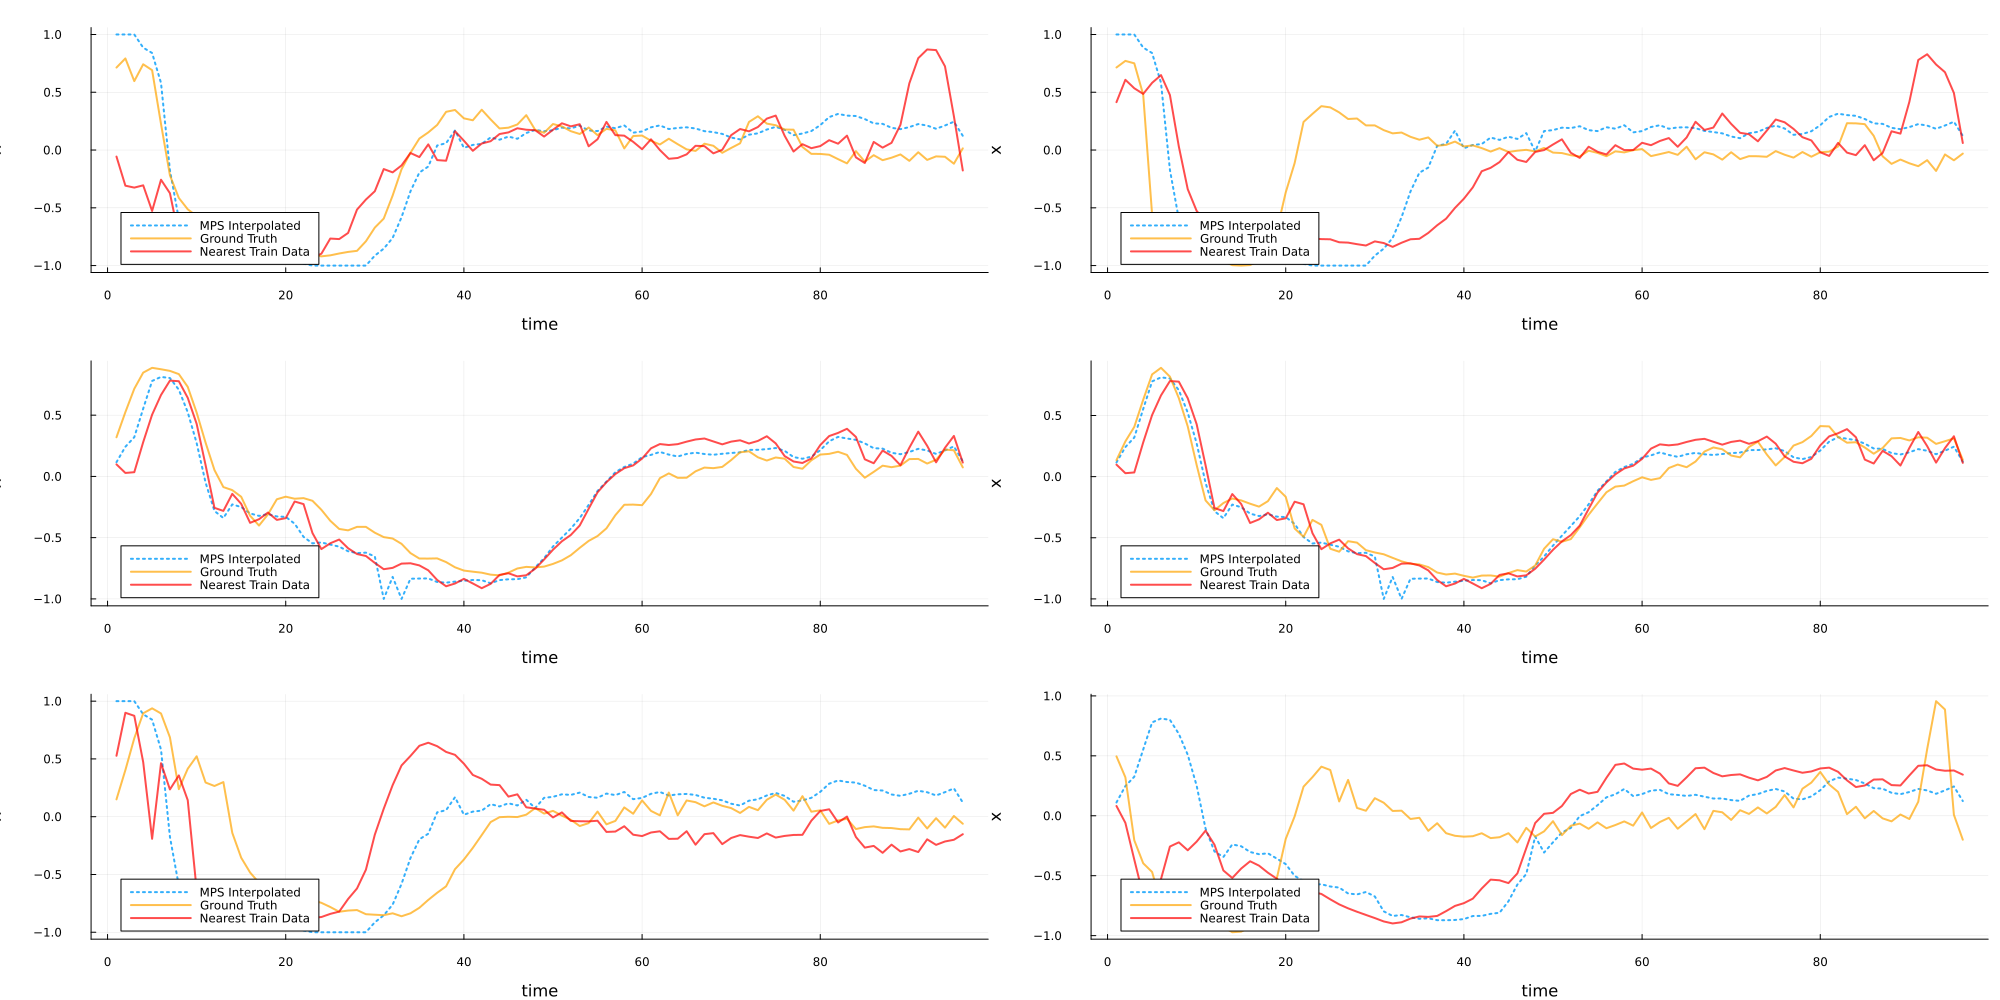

In [10]:
ps1 = ps[1]
p = plot(ps1[1:6]..., size=(2000,1000), layout=(3,2))
savefig(p, "figs/mid.svg")

p = plot(ps1[7:12]..., size=(2000,1000), layout=(3,2))
savefig(p, "figs/mid.svg")
display(p)

In [8]:
for i in eachindex(stats)
    n_mid = n_midpoints[i]
    println("Summary for $n_mid midpoints")
    stats_df = vcat(DataFrame.(stats[i])...)
    MSE_stats_df = vcat(DataFrame.(MSE_stats[i])...)

    print(describe(stats_df));
    println()
    print(describe(MSE_stats_df));

    println("\n")

end

UndefVarError: UndefVarError: `stats` not defined

In [9]:


MPS_mapes = [describe(select(vcat(DataFrame.(s)...), :MAPE), :mean)[1,2] for s in stats]
MSE_mapes =[describe(select(vcat(DataFrame.(s)...), :MAPE), :mean)[1,2] for s in MSE_stats]

UndefVarError: UndefVarError: `stats` not defined

In [11]:
plot(n_midpoints, MPS_mapes; xlabel="Number of Known Points", ylabel="MAPE",label="MPS interp.", title="ECG200 Curve fitting Benchmark")
plot!(n_midpoints, MSE_mapes;label="Nearest training (MSE) interp.")

UndefVarError: UndefVarError: `n_midpoints` not defined